# Demonstration of BNNs as uncertainty models

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
import sklearn.model_selection
import sklearn.preprocessing

import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow_datasets

import gandy.models.bnns

In [133]:
## loading the data
Xs, Ys = sklearn.datasets.load_boston(return_X_y=True)
Xsr, Xst, Ysr, Yst = sklearn.model_selection.train_test_split(Xs, Ys, train_size = 0.8)
Ysr = Ysr.reshape(-1,1); Yst = Yst.reshape(-1,1)
## normalizing the features and scaling the target
norm = sklearn.preprocessing.Normalizer()
scale = sklearn.preprocessing.StandardScaler()
Xsr = norm.fit_transform(Xsr)
Xst = norm.transform(Xst)
Ysr = scale.fit_transform(Ysr)
Yst = scale.transform(Yst)

In [134]:
print('X data: ', Xsr.shape, Xsr.dtype)
print('Y data: ', Ysr.shape, Ysr.dtype)

X data:  (404, 13) float64
Y data:  (404, 1) float64


Instantiate our model - using two hidden layers with 3 neurons each

In [135]:
bnn = gandy.models.bnns.BNN(Xs.shape[1:], (1,), 
                            train_size=len(Xsr), 
                            metrics=['mae'],
                            neurons=(3,3))

Train it for 1000 epochs, default batch size.

In [136]:
bnn.train(Xsr, Ysr, epochs=1000)

Epoch 1/1000
13/13 [==============================] - 1s 847us/step - loss: 2.8041 - mae: 1.2213
Epoch 2/1000
13/13 [==============================] - 0s 770us/step - loss: 2.6672 - mae: 1.1379
Epoch 3/1000
13/13 [==============================] - 0s 757us/step - loss: 2.5625 - mae: 1.1922
Epoch 4/1000
13/13 [==============================] - 0s 764us/step - loss: 2.2123 - mae: 1.0164
Epoch 5/1000
13/13 [==============================] - 0s 759us/step - loss: 2.0716 - mae: 1.0783
Epoch 6/1000
13/13 [==============================] - 0s 754us/step - loss: 2.0409 - mae: 1.0826
Epoch 7/1000
13/13 [==============================] - 0s 775us/step - loss: 1.7491 - mae: 0.9929
Epoch 8/1000
13/13 [==============================] - 0s 785us/step - loss: 2.1113 - mae: 1.0331
Epoch 9/1000
13/13 [==============================] - 0s 785us/step - loss: 1.8911 - mae: 1.0953
Epoch 10/1000
13/13 [==============================] - 0s 761us/step - loss: 2.0516 - mae: 1.1019
Epoch 11/1000
13/13 [========

Make predictions, uncertainies are returned too.

In [137]:
preds, uncs = bnn.predict(Xst)

Unscale the target values and uncertainties

In [138]:
preds = scale.inverse_transform(preds)
Yst = scale.inverse_transform(Yst)
uncs *= numpy.sqrt(scale.var_)

<ErrorbarContainer object of 3 artists>

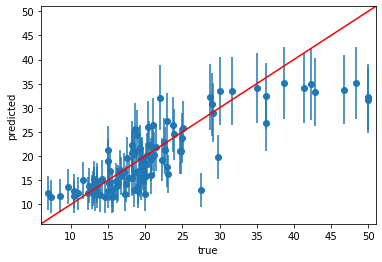

In [139]:
fig, ax = plt.subplots()
ax.scatter(Yst, preds)
minv, maxv = Yst.min()-1,  Yst.max()+1
ax.set_xlim(minv, maxv)
ax.set_ylim(minv, maxv)
ax.plot([minv, maxv], [minv, maxv], c='r')
ax.set_xlabel('true')
ax.set_ylabel('predicted')
ax.errorbar(Yst, preds, yerr=uncs.reshape(-1), ls='none')
